In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow numpy matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os

# Définir le chemin vers les données dans Google Drive
dataset_path = '/content/drive/MyDrive/CASIA-Iris-Thousand'

# Vérifier les fichiers dans le dossier
print(os.listdir(dataset_path))

['991', '992', '990', '996', '994', '995', '997', '993', '999', '998', '987', '988', '983', '986', '984', '981', '982', '989', '985', '980', '975', '971', '970', '976', '979', '974', '972', '977', '978', '973', '965', '960', '967', '961', '968', '962', '969', '963', '966', '964', '954', '959', '958', '955', '950', '956', '952', '951', '953', '957', '948', '943', '941', '946', '942', '944', '945', '949', '947', '940', '930', '938', '935', '931', '937', '936', '939', '934', '932', '933', '928', '922', '924', '923', '927', '921', '926', '929', '925', '920', '911', '915', '917', '919', '912', '916', '913', '910', '918', '914', '902', '907', '900', '903', '908', '901', '905', '904', '909', '906', '896', '893', '890', '897', '891', '899', '894', '892', '895', '898', '889', '882', '888', '880', '883', '884', '881', '886', '885', '887', '870', '871', '878', '872', '877', '876', '873', '879', '875', '874', '864', '865', '861', '860', '869', '862', '867', '868', '863', '866', '854', '853', '850'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Prétraitement des données
image_size = (128, 128)  # Taille des images
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    subset='validation'
)


Found 16000 images belonging to 1000 classes.
Found 4000 images belonging to 1000 classes.


In [ ]:
num_classes = 1000  # Nombre de classes
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Multi-classes
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         129,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,521,320 (28.69 MB)

 Trainable params: 7,521,320 (28.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3682s 7s/step - accuracy: 0.0033 - loss: 6.8712 - val_accuracy: 0.0088 - val_loss: 6.7640
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.0855 - loss: 5.4170 - val_accuracy: 0.0240 - val_loss: 6.9556
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.3349 - loss: 3.3895 - val_accuracy: 0.0468 - val_loss: 7.3925
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 596s 1s/step - accuracy: 0.6264 - loss: 1.6752 - val_accuracy: 0.0702 - val_loss: 8.3248
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.8368 - loss: 0.6787 - val_accuracy: 0.0817 - val_loss: 10.3824
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.9433 - loss: 0.2237 - val_accuracy: 0.0887 - val_loss: 12.1420
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 600s 1s/step - accuracy: 0.9811 - loss: 0.0817 - val_accuracy: 0.0905 - val_loss: 14.7066
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 603s 1s/step - accuracy: 0.9918 - loss: 0.0364 - val_

In [ ]:
# Évaluation sur les données de validation
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 402ms/step - accuracy: 0.0917 - loss: 15.1190
Validation Loss: 15.061388969421387
Validation Accuracy: 0.08924999833106995


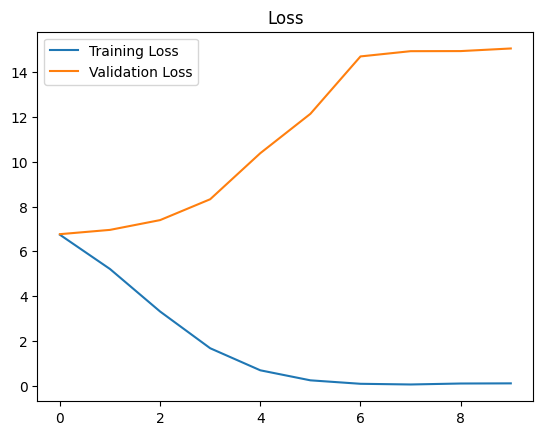

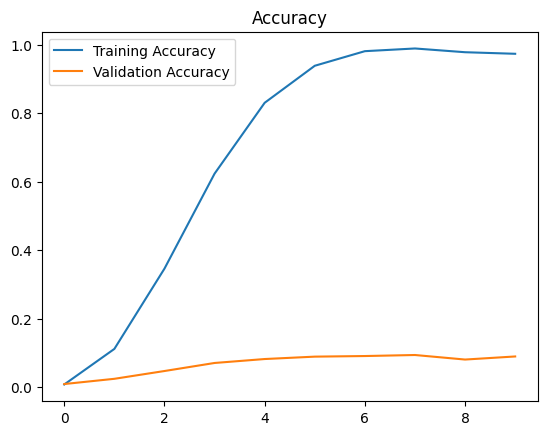

In [ ]:
import matplotlib.pyplot as plt

# Visualiser la perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Visualiser la précision
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Charger une image de test
img_path = '/content/drive/MyDrive/CASIA-Iris-Thousand/000/L/S5000L00.jpg'  # Remplace par le chemin de ton image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch

# Prédire la classe
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Classe prédite
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted Class: 124


In [ ]:
model.save('iris_recognition_model.h5')
print("Model saved successfully.")


Model saved successfully.


In [ ]:
import tensorflow as tf

# Charger le modèle au format HDF5
model = tf.keras.models.load_model('iris_recognition_model.h5')

# Convertir en TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Sauvegarder le modèle TFLite
with open('iris_recognition_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Le modèle a été converti en TensorFlow Lite.")


Saved artifact at '/tmp/tmpnlo0uuw4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None)
Captures:
  137347322832576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137347300197824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137347287592528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137347287595520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137347285258784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137347285268112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137347285268992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137347285269696: TensorSpec(shape=(), dtype=tf.resource, name=None)
Le modèle a été converti en TensorFlow Lite.


In [ ]:
import os
print(os.listdir('.'))


['.config', 'iris_recognition_model.h5', 'iris_recognition_model.tflite', 'drive', 'sample_data']


In [ ]:
!pip install flask-ngrok


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import io

app = Flask(__name__)
run_with_ngrok(app)
# Charger le modèle de reconnaissance d'iris
model = load_model("iris_recognition_model.h5")  # Assurez-vous que votre modèle est dans le répertoire approprié

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Recevoir l'image
        file = request.files['file']
        image = Image.open(io.BytesIO(file.read()))
        image = image.resize((128, 128))  # Redimensionnez à la taille requise par le modèle
        image_array = np.array(image) / 255.0  # Normaliser les pixels
        image_array = np.expand_dims(image_array, axis=0)  # Ajouter une dimension batch

        # Prédire
        prediction = model.predict(image_array)
        result = np.argmax(prediction, axis=1)[0]

        # Retourner le résultat
        return jsonify({"result": int(result)})

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-22:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll